In [3]:
import numpy as np #used  for numpy array
import pandas as pd #used to read the csv file
import matplotlib.pyplot as plt #importing matplot library 
from scipy.stats import skew, kurtosis #importing scipy library for skew and kurtosis methods
import seaborn as sns # It imports the seaborn library as sns
from scipy.stats import pearsonr, spearmanr #mport the Pearson and Spearman correlation functions from the scipy.stats module

In [4]:
df1 = pd.read_csv('nhanes_adult_female_bmx_2020.csv') #getting the contents of female csv file into df1
df2 = pd.read_csv('nhanes_adult_male_bmx_2020.csv') #getting the contents of male csv file into df2
pd.set_option('display.max_rows', 10)  # Set the max number of rows to display
pd.set_option('display.max_columns', 10)  # Set the max number of columns to display
pd.set_option('display.width', 1000)  # Set the display width
pd.set_option('display.colheader_justify', 'center')  # Center-align column headers
pd.set_option('display.precision', 2)
#giving new column heading for each column for a good understanding of the dataframe
df1.columns = ['weight (kg)', 'standing height (cm)','upper arm length (cm)','upper leg length (cm)','arm circumference (cm)',' hip circumference (cm)','waist circumference (cm)']
df2.columns = ['weight (kg)', 'standing height (cm)','upper arm length (cm)','upper leg length (cm)','arm circumference (cm)',' hip circumference (cm)','waist circumference (cm)']

In [5]:
#printing both the dataframes
print(df1)
print(df2)

      weight (kg)  standing height (cm)  upper arm length (cm)  upper leg length (cm)  arm circumference (cm)   hip circumference (cm)  waist circumference (cm)
0         97.1             160.2                 34.7                   40.8                    35.8                    126.1                     117.9         
1         91.1             152.7                 33.5                   33.0                    38.5                    125.5                     103.1         
2         73.0             161.2                 37.4                   38.0                    31.8                    106.2                      92.0         
3         61.7             157.4                 38.0                   34.7                    29.0                    101.0                      90.5         
4         55.4             154.6                 34.6                   34.0                    28.3                     92.5                      73.2         
...           ...                 

In [6]:
#converting the dataframes into numpy array
#female numpy array contains the contents of female(df1)
#male numpy array contains the contents of male(df2)
female=df1.to_numpy() 
male=df2.to_numpy()
print(male)
print("-----------------------------------------------------------------")
print(female)

[[ 98.8 182.3  42.  ...  38.2 108.2 120.4]
 [ 74.3 184.2  41.1 ...  30.2  94.5  86.8]
 [103.7 185.3  47.  ...  32.  107.8 109.6]
 ...
 [108.8 168.7  38.6 ...  33.6 118.  114.7]
 [ 79.5 176.4  39.5 ...  31.4  99.8  97.1]
 [ 59.7 167.5  40.3 ...  29.2  90.5  86.9]]
-----------------------------------------------------------------
[[ 97.1 160.2  34.7 ...  35.8 126.1 117.9]
 [ 91.1 152.7  33.5 ...  38.5 125.5 103.1]
 [ 73.  161.2  37.4 ...  31.8 106.2  92. ]
 ...
 [ 73.  159.6  36.2 ...  31.4 104.6  99.3]
 [ 78.6 168.5  38.1 ...  36.  102.4  98.5]
 [ 82.8 147.8  34.8 ...  39.5 121.4 110. ]]


print(male)

In [7]:
#from the male numpy array accessing the first column and creating a new array name male_weight containing the weights of all the male
male_weight=male[:,0]
print(male_weight)
#from the female numpy array accessing the first column and creating a new array name female_weight containing the weights of all the female
female_weight=female[:,0]
print(female_weight)
#from the male numpy array accessing the second column and creating a new array name male_height containing the heights of all the male
male_height=male[:,1]
print(male_height)
#from the female numpy array accessing the second column and creating a new array name female_height containing the heights of all the female
female_height=female[:,1]
print(female_height)

[ 98.8  74.3 103.7 ... 108.8  79.5  59.7]
[97.1 91.1 73.  ... 73.  78.6 82.8]
[182.3 184.2 185.3 ... 168.7 176.4 167.5]
[160.2 152.7 161.2 ... 159.6 168.5 147.8]


(0.0, 200.0)

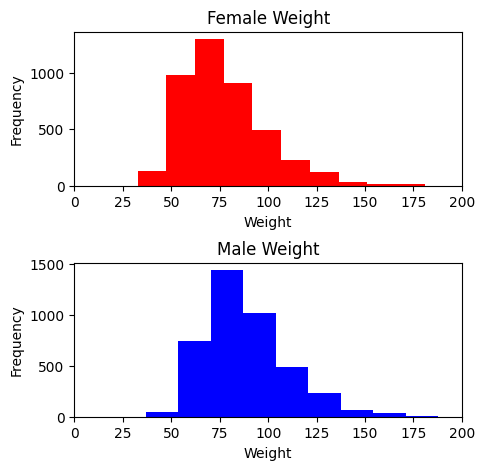

In [8]:
#plotting histograms (subplots)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 5)) #creating two subplots in two rows with each subplot having a figure size of 5x5 inches.
plt.subplots_adjust(hspace=0.5) #adjusts the vertical space between the two subplots
#plotting the first subplot
axs[0].hist(female_weight, bins=10, color='red', alpha=1)
axs[0].set_title('Female Weight')#sets the title of the first subplot
axs[0].set_xlabel('Weight')#gives the label on x-axis
axs[0].set_ylabel('Frequency')#gives the label on y-axis
axs[0].set_xlim(0, 200)#it sets the limit of the x-axis with '200' being the max and '0' being the min
#plotting the second subplot
axs[1].hist(male_weight, bins=10, color='blue', alpha=1)
axs[1].set_title('Male Weight')#sets the title of the second subplot
axs[1].set_xlabel('Weight')#gives the label on x-axis
axs[1].set_ylabel('Frequency')#gives the label on y-axis
axs[1].set_xlim(0, 200)#it sets the limit of the x-axis with '200' being the max and '0' being the min

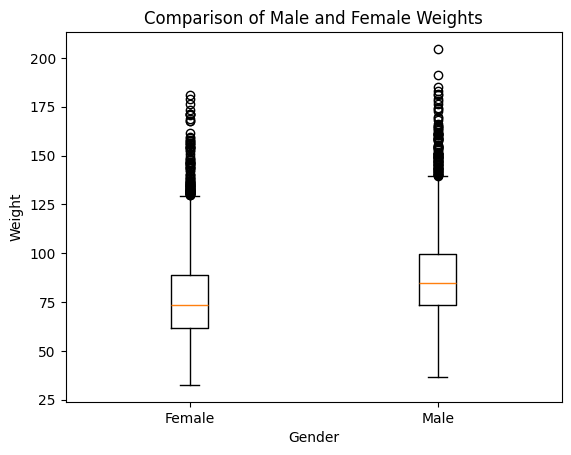

In [9]:
#BOX AND WHISKER PLOT
fig, ax = plt.subplots()#It creates a figure 
ax.boxplot([female_weight, male_weight], tick_labels=['Female', 'Male'])#it creates a box plot
ax.set_xlabel('Gender') #gives the label on x-axis
ax.set_ylabel('Weight') #gives the label on y-axis
ax.set_title('Comparison of Male and Female Weights')#gives the title of the plot   
plt.show()#use to show the plot

In [10]:

def compute_aggregates(weights): #defining a function compute_aggregates
    mean = np.mean(weights) #np.mean() is used to compute the mean of numpy array
    print("mean:" ,mean)
    median = np.median(weights) #np.median() is used to compute the median of numpy array
    print("median:",median)
    variance = np.var(weights, ddof=1) #np.var() is used to compute the variance of numpy array
    print("variance:",variance)
    std_dev = np.std(weights, ddof=1)#np.std() is used to compute the standard variance of numpy array
    print("standard deviation:",std_dev) 
    iqr = np.percentile(weights, 75) - np.percentile(weights, 25) #np.percentile() is used for inter-quartile range
    print("inter-quartile range:",iqr)
    skewness = skew(weights) #for skewness
    print("skewness:",skewness)
    kurt = kurtosis(weights) #for kurtosis
    print("kurtosis",kurt)
    
print("FEMALE AGGREGATES")
compute_aggregates(female_weight) #calling the compute_aggregates function for female weights
print("-----------------------------------------")
print("MALE AGGREGATES")
compute_aggregates(male_weight)#calling the compute_aggregates function for male weights
 


FEMALE AGGREGATES
mean: 77.40379057095475
median: 73.6
variance: 464.1896349172665
standard deviation: 21.545060568892968
inter-quartile range: 27.1
skewness: 1.03336107186799
kurtosis 1.4009683480659731
-----------------------------------------
MALE AGGREGATES
mean: 88.36454300416565
median: 85.0
variance: 458.8832939638977
standard deviation: 21.421561426840427
inter-quartile range: 26.5
skewness: 0.9842810741662347
kurtosis 1.4742884754078238


In [11]:
female_BMI = female_weight/((female_height/100)**2) #calculating the bmi of the female weights
female = np.column_stack((female, female_BMI)) #creating a new column in female numpyarray with all the elements of female_bmi
print(female)


[[ 97.1        160.2         34.7        ... 126.1        117.9
   37.83504078]
 [ 91.1        152.7         33.5        ... 125.5        103.1
   39.06972037]
 [ 73.         161.2         37.4        ... 106.2         92.
   28.09265496]
 ...
 [ 73.         159.6         36.2        ... 104.6         99.3
   28.65873958]
 [ 78.6        168.5         38.1        ... 102.4         98.5
   27.68361084]
 [ 82.8        147.8         34.8        ... 121.4        110.
   37.90368801]]


In [12]:
mean = np.mean(female)#np.mean() is used to compute the mean of numpy array
print(mean)
std_dev = np.std(female)#np.std() is used to compute the standard deviation of numpy array
print(std_dev)
zfemale = (female - mean) / std_dev #standardised version of female array
print(zfemale)

72.65122192493094
45.89746435394765
[[ 0.53268254  1.90748616 -0.82686969 ...  1.16452573  0.98586662
  -0.75856437]
 [ 0.40195637  1.74407844 -0.85301492 ...  1.15145311  0.66340872
  -0.73166355]
 [ 0.00759907  1.92927386 -0.76804291 ...  0.73095058  0.42156529
  -0.97082851]
 ...
 [ 0.00759907  1.89441354 -0.79418814 ...  0.69609026  0.58061548
  -0.95849483]
 [ 0.12961017  2.08832404 -0.75279152 ...  0.64815733  0.56318532
  -0.97974064]
 [ 0.22111849  1.63731873 -0.82469092 ...  1.06212356  0.81374382
  -0.75706871]]


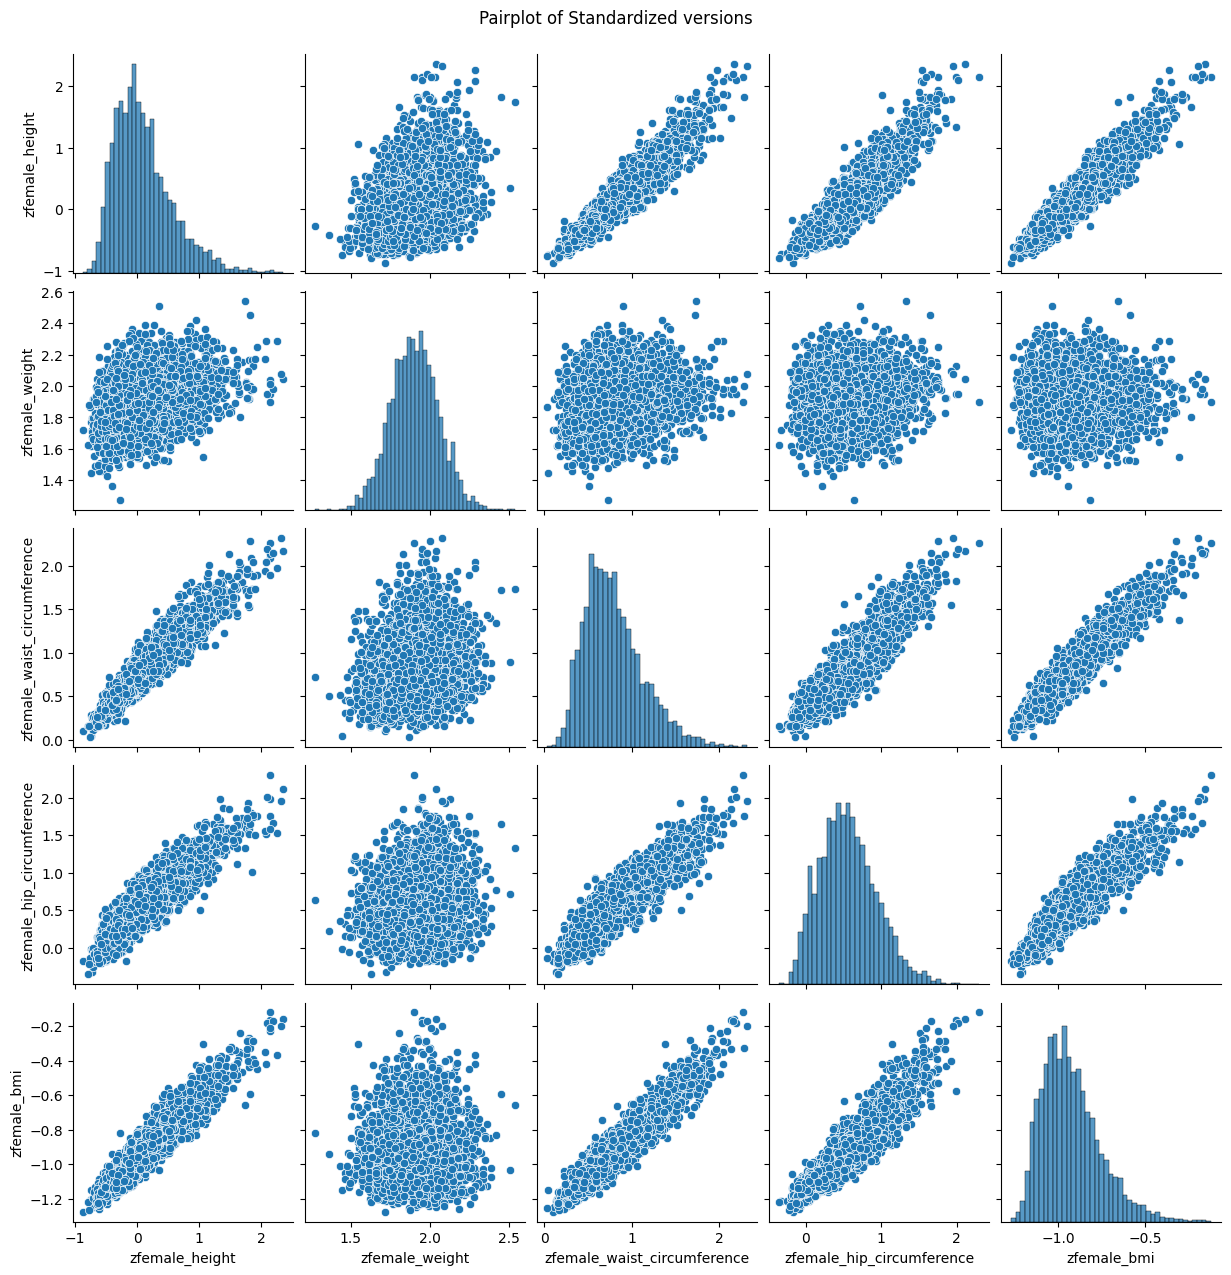

In [13]:
#CREATING A PAIR PLOT FOR ZFEMALE ARRAY(STANDARDISED VERSION OF FEMALE ARRAY)

selected_columns=[0,1,5,6,7] #Define a list of column indices that you want to select from your dataset.
zfemale_new=zfemale[:,selected_columns] #Cretes a new array named zfemale_new that contains specified columns 
df = pd.DataFrame(zfemale_new, columns=['zfemale_height', 'zfemale_weight', 'zfemale_waist_circumference', 'zfemale_hip_circumference', 'zfemale_bmi']) #This line converts the sliced array zfemale_new into a pandas DataFrame and assigns column names 
sns.pairplot(df)#This command generates a pair plot using the DataFrame df.
plt.suptitle('Pairplot of Standardized versions', y=1.02)
plt.show()

In [14]:

pearson_corr = np.corrcoef(zfemale, rowvar=False) #This line calculates the Pearson correlation coefficients for the zfemale

spearman_corr = spearmanr(zfemale, axis=0) #This line calculates the spearman correlation coefficients for the zfemale

print("Pearson's correlation coefficients:")
print(pearson_corr)

print("\nSpearman's correlation coefficients:")
print(spearman_corr)

Pearson's correlation coefficients:
[[ 1.          0.34549627  0.55156338  0.19318571  0.90538509  0.94655347
   0.90455038  0.94590048]
 [ 0.34549627  1.          0.66791075  0.65720245  0.1519549   0.20289468
   0.12654714  0.03307725]
 [ 0.55156338  0.66791075  1.          0.475645    0.45312216  0.45939973
   0.42789262  0.36466006]
 [ 0.19318571  0.65720245  0.475645    1.          0.07987579  0.10026843
  -0.03480285 -0.01481855]
 [ 0.90538509  0.1519549   0.45312216  0.07987579  1.          0.86806275
   0.84506542  0.91538778]
 [ 0.94655347  0.20289468  0.45939973  0.10026843  0.86806275  1.
   0.89740696  0.94419901]
 [ 0.90455038  0.12654714  0.42789262 -0.03480285  0.84506542  0.89740696
   1.          0.92119833]
 [ 0.94590048  0.03307725  0.36466006 -0.01481855  0.91538778  0.94419901
   0.92119833  1.        ]]

Spearman's correlation coefficients:
SignificanceResult(statistic=array([[ 1.        ,  0.33885953,  0.54150066,  0.19582141,  0.9139129 ,
         0.94663413,  0

In [15]:
female_waist_circumference=female[:,6] #accessing the waist_circumference from the female array
female_height=female[:,1] #accessing the height from the female array
female_hip_circumference=female[:,5 ]##accessing the hip_circumference from the female array
waist_to_height_female=female_waist_circumference/female_height #calculating waist to height circumference ratio
waist_to_hip_female=female_waist_circumference/female_hip_circumference #calculating waist to hip circumference ratio
female = np.column_stack((female, waist_to_height_female ,waist_to_hip_female)) #adding the two new created array in the female array 
print(female)
print("---------------------------------------------------------------------------")
male_waist_circumference=male[:,6] #accessing the waist_circumference from the male array
male_height=male[:,1]#accessing the height from the male array
male_hip_circumference=male[:,5]##accessing the hip_circumference from the male array
waist_to_height_male=male_waist_circumference/male_height#calculating waist to height circumference ratio
waist_to_hip_male=male_waist_circumference/male_hip_circumference#calculating waist to hip circumference ratio
male = np.column_stack((male, waist_to_height_male ,waist_to_hip_male))#adding the two new created array in the male array 
print(male)

[[ 97.1        160.2         34.7        ...  37.83504078   0.73595506
    0.93497224]
 [ 91.1        152.7         33.5        ...  39.06972037   0.67518009
    0.82151394]
 [ 73.         161.2         37.4        ...  28.09265496   0.5707196
    0.86629002]
 ...
 [ 73.         159.6         36.2        ...  28.65873958   0.62218045
    0.94933078]
 [ 78.6        168.5         38.1        ...  27.68361084   0.58456973
    0.96191406]
 [ 82.8        147.8         34.8        ...  37.90368801   0.74424899
    0.90609555]]
---------------------------------------------------------------------------
[[ 98.8        182.3         42.         ... 120.4          0.66044981
    1.11275416]
 [ 74.3        184.2         41.1        ...  86.8          0.47122693
    0.91851852]
 [103.7        185.3         47.         ... 109.6          0.59147329
    1.01669759]
 ...
 [108.8        168.7         38.6        ... 114.7          0.67990516
    0.9720339 ]
 [ 79.5        176.4         39.5        ...

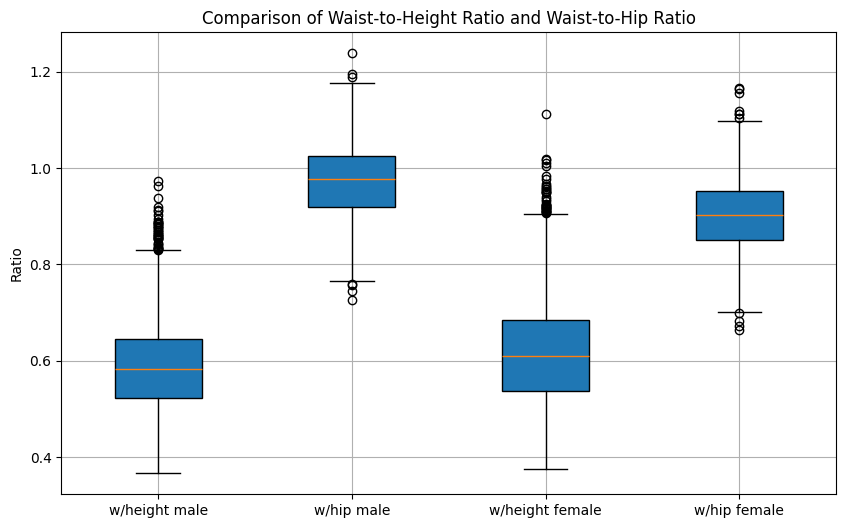

In [16]:
data=[waist_to_height_male,waist_to_hip_male,waist_to_height_female,waist_to_hip_female] #creating a list of three ratios
labels=['w/height male','w/hip male','w/height female','w/hip female'] #Corresponding labels for each ratio list to be displayed on the boxplot.
#box  plot creation 
plt.figure(figsize=(10, 6)) 
plt.boxplot(data, tick_labels=labels, vert=True, patch_artist=True)
plt.title('Comparison of Waist-to-Height Ratio and Waist-to-Hip Ratio')
plt.ylabel('Ratio')
plt.grid(True)  
# Show plot
plt.show()

List some advantages and disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio.

Body Mass Index (BMI)
Advantages
1. BMI is easy to calculate using just weight and height.
2. Provides a widely accepted and standardized method for classifying weight status (underweight, normal weight, overweight, obese).
3. Commonly used in epidemiological studies and public health research.
Disadvntages
1. BMI can misclassify muscular individuals as overweight or obese.
2. Doesn't provide information on fat distribution, which is important for assessing health risks.
3. May not accurately reflect health status in certain populations (e.g., elderly, children, athletes).

Waist-to-Height Ratio
Advantages:
1. More closely related to visceral fat, which is associated with higher health risks.
2. Easy to measure and calculate.
3. Can be used across different ethnic groups and age ranges.
Disadvantages:
1. Like BMI, it does not distinguish between muscle and fat.
2. Accurate measurement of waist circumference is crucial, and slight errors can affect results.
3. Not as widely recognized or used as BMI, so it might not be as useful for comparative studies or broad health guidelines.

Waist-to-Hip Ratio
Advantages:
1. Provides information on fat distribution, particularly abdominal fat, which is a risk factor for cardiovascular diseases.
2. Can be a good indicator of metabolic health and risk of conditions like type 2 diabetes and heart disease.
Disadvantages:
1. Requires precise measurements of both waist and hip circumferences, which can be difficult to obtain consistently.
2. Does not account for the amount of muscle versus fat.
3. May have different implications for health risk across different populations and ethnic groups.

In [17]:
zfemale_bmi=zfemale[:,7] #Extract the BMI values for females
sorted_indices=np.argsort(zfemale_bmi) # Sort the indices based on BMI values
lowest_indices=sorted_indices[0:5] # Find the indices of the five lowest BMI values
largest_indices=sorted_indices[-5:] # Find the indices of the five highest BMI values
print(lowest_indices)
print(largest_indices)
print('=============== standardised body measurements for the 5 persons with the lowest BMI=================')
for idx in lowest_indices:
    print(f"Person {idx + 1}: {zfemale[idx]}")
print('================ standardised body measurements for the 5 persons with the largest BMI================')
for idx in largest_indices:
    print(f"Person {idx + 1}: {zfemale[idx]}")

[ 262 3478 2126 2753 1209]
[2268 3022 1472 1104 1096]
=============== standardised body measurements for the 5 persons with the lowest BMI=================
Person 263: [-0.87262385  1.71793321 -0.87698139 -0.85519369 -1.13843374  0.10128616
 -0.17323881 -1.27344336]
Person 3479: [-0.77893675  1.87698339 -0.88569646 -0.74625521 -1.16893651  0.16447048
 -0.2168142  -1.26408926]
Person 2127: [-0.6177078   2.1841899  -0.76586414 -0.73318259 -1.14714882  0.22547603
 -0.08390925 -1.2600347 ]
Person 2754: [-0.7615066   1.86608954 -0.80943953 -0.73754013 -1.15150636  0.02938677
 -0.14055726 -1.25511641]
Person 1210: [-0.65256812  2.04256988 -0.80290322 -0.7397189  -1.14061251  0.17318556
 -0.08608802 -1.24690795]
================ standardised body measurements for the 5 persons with the largest BMI================
Person 2269: [ 2.09703912  1.95106155 -0.70267982 -0.84212107 -0.58066872  2.19290498
  2.00988833 -0.18415545]
Person 3023: [ 2.19508375  1.9837431  -0.7113949  -0.85301492 -0.46083